
## View interactive titanic vizualizations here: 

https://public.tableau.com/views/TitanicbyGender/Titanic-Gender?:embed=y&:display_count=yes
            
https://public.tableau.com/views/TitanicbyP-Class/Titanic-Class?:embed=y&:display_count=yes

In [ ]:
import pandas as pd

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtc = DecisionTreeClassifier(max_depth = 3)
dtc2 = DecisionTreeClassifier(max_depth = 5)
dtc4 = DecisionTreeClassifier(max_depth = 4)


In [2]:
def run_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    conmat_1 = confusion_matrix(y_test, y_preds, labels=model.classes_)
    conmat_1 = pd.DataFrame(conmat_1, columns=model.classes_, index=model.classes_)
    print(accuracy_score(y_test,y_preds))
    print(conmat_1)
    print(classification_report(y_test,y_preds))
    #return (accuracy_score(y_test,y_preds), (conmat_1), classification_report(y_test,y_preds))

In [6]:
ship = pd.read_csv('https://raw.githubusercontent.com/ga-students/DC-DSI-3/master/curriculum/04-week/4.10-feature-selection-lab/train.csv?token=AWHgUqrrIpKlvdYxjAYbwxfe2rmtVS3eks5YuVqRwA%3D%3D')

In [7]:
ship.shape

(891, 12)

In [8]:
ship.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
ship2 = ship[ship.Age.notnull()]

In [25]:
ship2.drop('Cabin', axis=1, inplace = True)

In [19]:
ship2.to_csv('titanic.csv')

In [14]:
ship2.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [15]:
ship_dummies2 = pd.get_dummies(ship2.Sex).iloc[:, 1:]

# concatenate two DataFrames (axis=0 for rows, axis=1 for columns)
ship2 = pd.concat([ship2, ship_dummies2], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .75, random_state = 10)

In [17]:
X2 = ship2.drop(['PassengerId','Survived', 'Name', 'Sex', 'Parch', 'Ticket', 'Fare', 'Embarked'], axis =1)
y2 = ship2['Survived']

In [19]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, train_size = .75, random_state = 10)

Looks like more females survived 

In [58]:
ship2.groupby('Sex').Survived.describe()

Sex          
female  count    88.000000
        mean      0.931818
        std       0.253502
        min       0.000000
        25%       1.000000
        50%       1.000000
        75%       1.000000
        max       1.000000
male    count    95.000000
        mean      0.431579
        std       0.497924
        min       0.000000
        25%       0.000000
        50%       0.000000
        75%       1.000000
        max       1.000000
Name: Survived, dtype: float64

In [23]:
run_model(dtc4, X_train2, X_test2, y_train2, y_test2)

0.804469273743
    0   1
0  99   4
1  31  45
             precision    recall  f1-score   support

          0       0.76      0.96      0.85       103
          1       0.92      0.59      0.72        76

avg / total       0.83      0.80      0.79       179



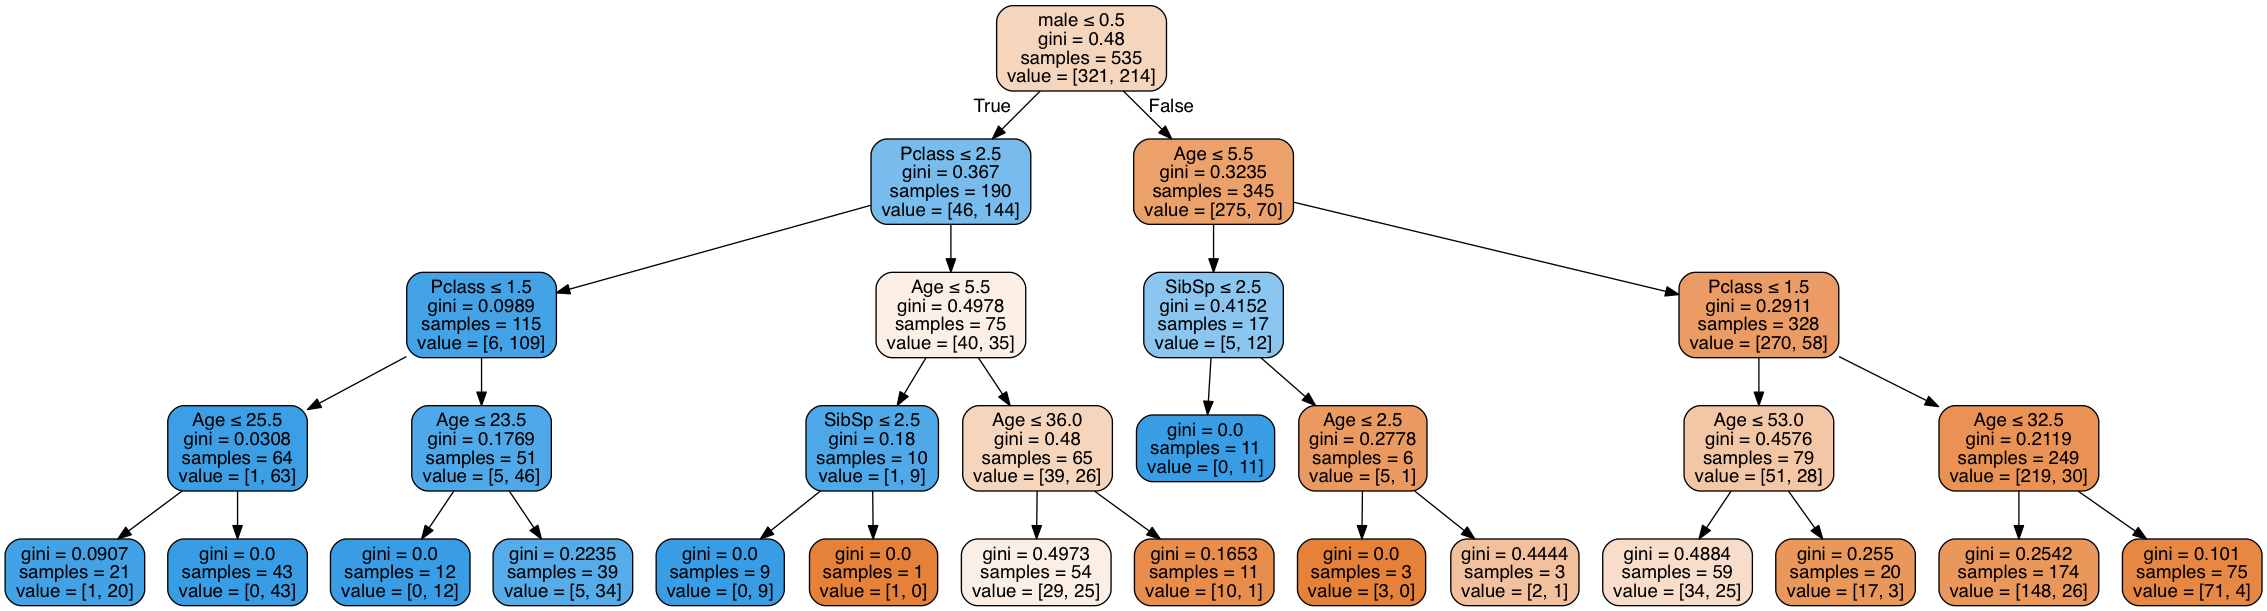

In [24]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtc4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X2.columns,)
#                class_names= dtc2.classes_)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())